# Logistic Regression for Isotope Identification Evaluation

install via ```conda install -c r r-essentials```

also need the `install.packages('popbio')` in R for fancy loghist plots


In [ ]:
library(popbio)

data <- read.csv("id.r.csv")


Clean up names and add label column and take a peak.

In [ ]:
colnames(data)[1] <- "Source"
colnames(data)[2] <- "TTI.s"
data$both_correct <- data$correct1 * data$correct2
head(data)

In [ ]:
plot(data$CL1, data$correct1)

## Simplest Fit that could work

We want to predict whether the identification is correct based on the available data. We will focus on the first listed isotope and confidence level first.

Logistic Regression is a type of Generalized Linear Model, `glm` in R, specfied by choosing the binomial family.

https://stat.ethz.ch/R-manual/R-devel/library/stats/html/family.html for more details.

In [ ]:
glm1 <- glm(correct1 ~ CL1, binomial, data)
summary(glm1)


In [ ]:
plot(glm1)

## Add Second Isotope and timing information

We really want to know if both isotopes reported are correct so lets extend the model and change which label we are trying to predict.

In [ ]:
glm2 <- glm(both_correct ~ CL1 + CL2 + TTI.s, binomial, data)
summary(glm2)

## Slightly Different Look at data

Let's treat the two isotopes independently, adding the order on screen as a dummy variable.




In [ ]:
data.single <- read.csv("id.r.single.csv")
colnames(data.single)[1] <- "Source"
colnames(data.single)[2] <- "TTI.s"

head(data.single)

### Here we build a model with all the binary and continuous features.

In [ ]:
glm.single <- glm(correct ~ CL + TTI.s + bolus  + num, binomial, data.single)
summary(glm.single)

### We can examine the predicted values of the linear model. The response option is needed to retreive the probability instead of the "z" of the linear model.

In [ ]:
head(predict(glm.single, type = "response"))

### By exponentiating the coefficents we compute the odds ratio for a unit increase per feature.

In [ ]:
exp(coef(glm.single))

In [ ]:
drop1(glm.single, test="Chisq")

## Simplify and recompute

So lets drop TTI and bolus and look again...

In [ ]:
glm.single.final <- glm(correct ~ CL + num, binomial, data.single)
summary(glm.single.final)

### Compare the new model to the old via Analysis of Variance (ANOVA)

In [ ]:
anova(glm.single, glm.single.final)

In [ ]:
plot(data.single$CL, data.single$correct, col = "black")
curve(predict(glm.single.final, data.frame(CL=x, num=0),type="resp"), add=TRUE, col = "red")
curve(predict(glm.single.final, data.frame(CL=x, num=1),type="resp"), add=TRUE, col = "blue")

## Fancy plot

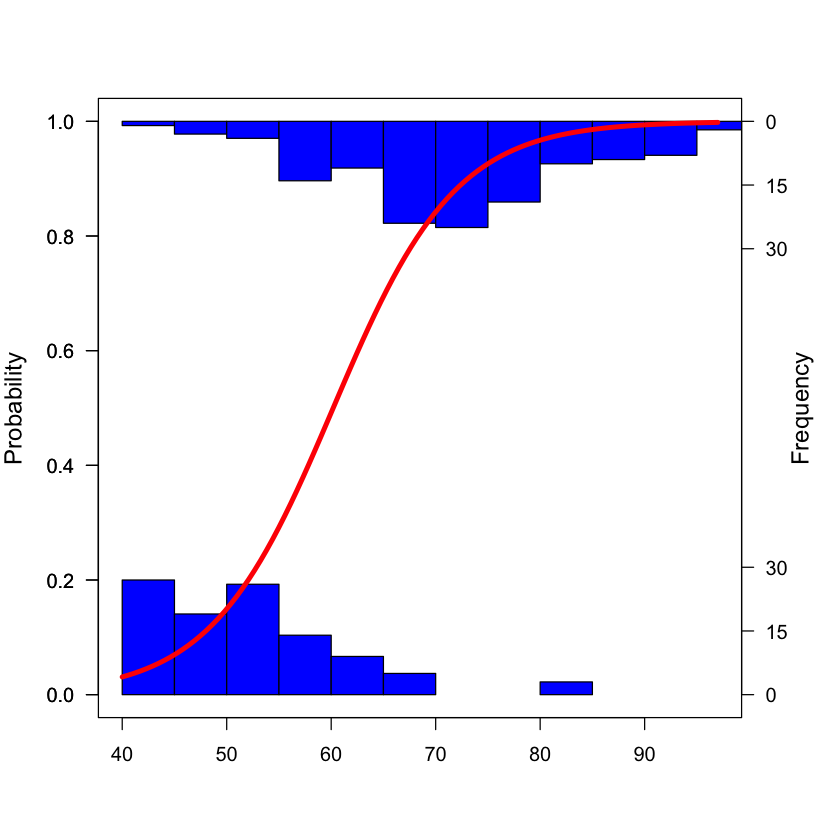

In [83]:
data.single <- na.omit(data.single)

logi.hist.plot(data.single$CL,data.single$correct,boxp=FALSE,type="hist")


## Further things to try

* Use the isotope identified as a factor, some may be biased more than seen in CL alone. 
* Interaction terms, `term1*term2 =  term1 + term2 + term1:term2`
* add1, and search can test this automatically given a scope of interactions and features to consider
